In [1]:
library(arrow)
library(Seurat)

raw_data =read_feather('cellsAll.feather')


Warning message:
"package 'arrow' was built under R version 4.1.3"

Attaching package: 'arrow'


The following object is masked from 'package:utils':

    timestamp


Warning message:
"package 'Seurat' was built under R version 4.1.3"
Attaching SeuratObject

Attaching sp



In [2]:
library(dplyr)
raw_data = as.matrix(raw_data) %>% as.data.frame()
rownames(raw_data) = raw_data$Gene
raw_data = raw_data[,-1]

Warning message:
"package 'dplyr' was built under R version 4.1.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
metadata = read.table('bcell1_initial_meta.txt', header = TRUE, stringsAsFactors = FALSE, sep = ',', row.names = 1)
head(metadata)


,orig,bc,n_genes,n_counts,leiden
,<chr>,<chr>,<int>,<dbl>,<int>
BCell1_0,BCell1,AAAAGAGCTAGT,585,1119,4
BCell1_1,BCell1,AAAAGCTATCTA,800,1244,6
BCell1_2,BCell1,AAAAGGTTCTAC,385,577,0
BCell1_4,BCell1,AAAATGATCTTA,301,489,5
BCell1_5,BCell1,AAAATTATGCCA,337,494,5
BCell1_6,BCell1,AAACACCATAGG,545,1011,0


In [4]:
raw_data = raw_data[colnames(raw_data) %in% rownames(metadata)]

In [5]:
seurat = CreateSeuratObject(raw_data)


Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [6]:
seurat@meta.data = cbind(seurat@meta.data, metadata[colnames(seurat),])

In [7]:
seurat


An object of class Seurat 
26197 features across 24806 samples within 1 assay 
Active assay: RNA (26197 features, 0 variable features)

Regressing out nFeature_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  LYZ, VCAN, FCN1, S100A9, S100A8, SERPINA1, IFI30, PSAP, SRGN, TYROBP 
	   CTSS, FGL2, CST3, TGFBI, KLF4, AIF1, FCER1G, CPVL, NCF2, FTH1 
	   CD14, CEBPB, PLBD1, MPEG1, APLP2, FGR, CTSB, CFP, TKT, ITGB2 
Negative:  MS4A1, IGHM, TRBC2, IGHD, HLA-DPB1, TTN, SYNE2, FCRL3, IL4R, IGJ 
	   SPOCK2, ITM2C, IGKC, CDK6, LDHB, MDN1, CCND2, IGHA1, TCF7, AC096579.7 
	   CBX5, ANKRD28, HOPX, KIAA0125, IGHG1, MYC, GPR15, PARM1, BAIAP3, PCDH9 
PC_ 2 
Positive:  HLA-DRA, MALAT1, HLA-DRB1, HLA-DPA1, HLA-DPB1, CYBB, MS4A1, IGHM, RHOB, CTSZ 
	   CTSS, ZFP36, MPEG1, DUSP1, NFKBIA, IGHD, JUNB, IL4R, FCN1, IFI30 
	   VCAN, APLP2, SERPINA1, S100A8, UBC, LTA4H, NCF2, HCK, FGL2, PLBD1 
Negative:  TUBB1, SDPR, PPBP, SPARC, PRKAR2B, ITGA2B, GNG11, PF4, C6ORF25, SH3BGRL2 
	   LTBP1, RAB27B, TREML1, PTGS1, CTDSPL, NRGN, RGS18, CLU, PDE5A, MFAP3L 
	   SELP, MMRN1, TAL1, C2ORF88, GRAP2, CTTN, DNM3, F13A1, DMTN, LGALSL 
PC_ 3 
Positive:  

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 24806
Number of edges: 910907

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9333
Number of communities: 10
Elapsed time: 8 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
13:09:54 UMAP embedding parameters a = 0.9922 b = 1.112

13:09:54 Read 24806 rows and found 30 numeric columns

13:09:54 Using Annoy for neighbor search, n_neighbors = 30

13:09:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:10:01 Writing NN index file to temp file C:\Users\dmorgan\AppData\Local\Temp\2\Rtmp8IthTc\file285c4fd378c6

13:10:01 Searching Annoy index using 1 thread, search_k = 3000

13:10:12 Annoy recall = 100%

13:10:14 Commencing smooth kNN distance calibration using 1

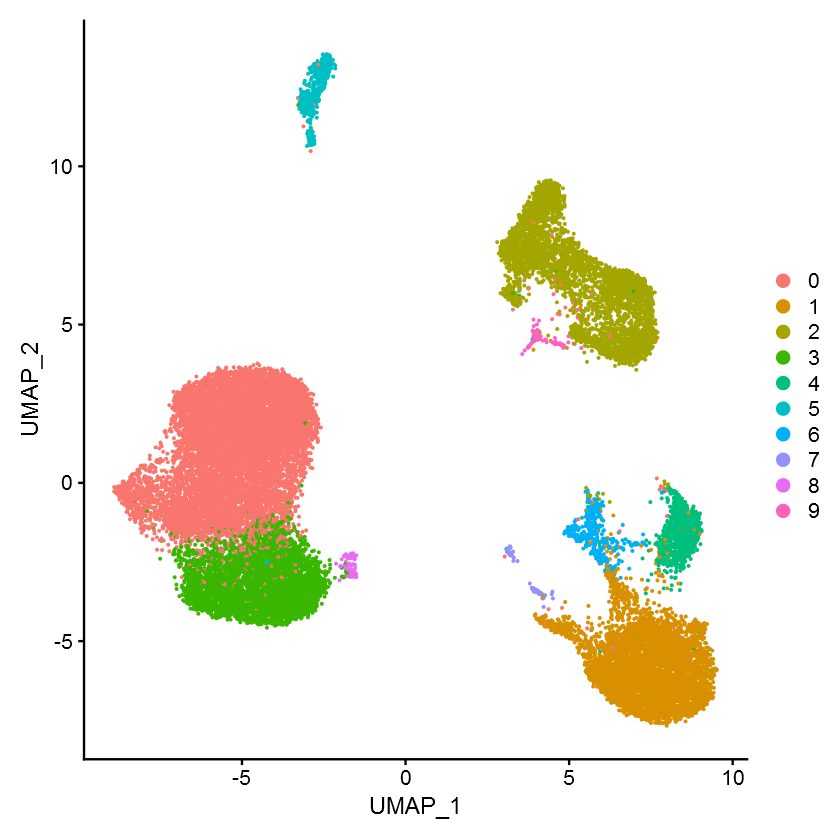

In [8]:
seurat <- NormalizeData(seurat, normalization.method = "LogNormalize", scale.factor = 10000)
seurat = FindVariableFeatures(seurat, selection.method = 'vst', nfeatures = 2000)
seurat = ScaleData(seurat, features = rownames(seurat), vars.to.regress = 'nFeature_RNA')
seurat = RunPCA(seurat, features = VariableFeatures(seurat))
seurat = FindNeighbors(seurat, dims = 1:30)
seurat = FindClusters(seurat, resolution = .2)
seurat = RunUMAP(seurat, dims = 1:30)
DimPlot(seurat)

In [9]:
saveRDS(seurat, 'initialSeurat_bcell1.RDS')